<h1><font color="#004D7F" size=7>Predicción de incumplimiento de pago de clientes de tarjetas de crédito</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=4>AEL-DEV</font><br>

---

<h2><font color="#004D7F" size=6>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Cargar CSV](#section2)
* [3. Descripción del conjunto de datos](#section3)
* [4. Análisis exploratorio de los datos](#section4)
    * [4.1. Análisis univariado](#section41)
    * [4.2. Prueba de normalidad](#section42)
    * [4.3. Análisis bivariado](#section43)
    * [4.4. Análisis multivariado](#section44)
* [5. Preprocesamiento de los datos](#section5)
    * [5.1. Imputación de valores faltantes](#section51)
    * [5.2. Tratamiento de outliers](#section52)
    * [5.3. Escalamiento de los datos](#section53)
    * [5.4. Division de los datos en entrenamiento y prueba](#section54)
* [6. Modelado](#section6)
    * [6.1. Elección de los algoritmos](#section61)
    * [6.2. Entrenamiento](#section62)
* [7. Evaluación del modelo 1](#section7)
* [8. Ajuste de hiperparametros](#section8)
    * [8.1. Entrenamiento](#section81)
* [9. Evaluación del modelo 2](#section9)

* [10. Selección de características](#section10)
    * [10.1. Entrenamiento](#section101)
* [11. Selección del mejor modelo](#section11)
* [12. Implementación](#section12)
* [13. Conclusiones](#section13)





---

<a id="section1"></a>
## <font color="#004D7F" size=6> 1. Introducción</font>

Fuente de datos: [Kaggle](https://www.kaggle.com/datasets/juancamilosierra/default?resource=download)

<font color="#004D7F" size=5> Descripción general de los datos</font>

El dataset contiene información de 23 variables explicativas y una variable respuesta binaria, que indica si el cliente incurrió o no en el incumplimiento de pago (Sí = 1, No = 0). Las variables explicativas incluyen datos demográficos, financieros y de comportamiento de pago de los clientes, tales como:


| Variable | Descripción |
| --- | --- |
| ID | ID de cada cliente |
| LIMIT_BAL | Monto del crédito otorgado en NT dólares (incluye el crédito individual y familiar/suplementario) |
| SEX | Género (1=masculino, 2=femenino) |
| EDUCATION | (1=escuela de posgrado, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido) |
| MARRIAGE | Estado civil (1=casado, 2=soltero, 3=otros) |
| AGE | Edad en años |
| PAY_0 | Estado de pago en septiembre de 2005 (-1=pago puntual, 1=retraso de pago de un mes, 2=retraso de pago de dos meses, … 8=retraso de pago de ocho meses, 9=retraso de pago de nueve meses o más) |
| PAY_2 | Estado de pago en agosto de 2005 (escala igual que la anterior) |
| PAY_3 | Estado de pago en julio de 2005 (escala igual que la anterior) |
| PAY_4 | Estado de pago en junio de 2005 (escala igual que la anterior) |
| PAY_5 | Estado de pago en mayo de 2005 (escala igual que la anterior) |
| PAY_6 | Estado de pago en abril de 2005 (escala igual que la anterior) |
| BILL_AMT1 | Monto del estado de cuenta en septiembre de 2005 (NT dólar) |
| BILL_AMT2 | Monto del estado de cuenta en agosto de 2005 (NT dólar) |
| BILL_AMT3 | Monto del estado de cuenta en julio de 2005 (NT dólar) |
| BILL_AMT4 | Monto del estado de cuenta en junio de 2005 (NT dólar) |
| BILL_AMT5 | Monto del estado de cuenta en mayo de 2005 (NT dólar) |
| BILL_AMT6 | Monto del estado de cuenta en abril de 2005 (NT dólar) |
| PAY_AMT1 | Monto del pago anterior en septiembre de 2005 (NT dólar) |
| PAY_AMT2 | Monto del pago anterior en agosto de 2005 (NT dólar) |
| PAY_AMT3 | Monto del pago anterior en julio de 2005 (NT dólar) |
| PAY_AMT4 | Monto del pago anterior en junio de 2005 (NT dólar) |
| PAY_AMT5 | Monto del pago anterior en mayo de 2005 (NT dólar) |
| PAY_AMT6 | Monto del pago anterior en abril de 2005 (NT dólar) |
| default.payment.next.month | Pago por defecto (1=sí, 0=no) |


<font color="#004D7F" size=5> Objetivo</font>

El objetivo de este proyecto es predecir el incumplimiento de pago de los clientes de tarjetas de crédito mediante algoritmos de machine learning.

---

<a id="section2"></a>
## <font color="#004D7F" size=6> 2. Cargar CSV</font>

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/default_of_credit_card_clients.csv')
df.head(3)

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  

[3 rows x 25 columns]

In [3]:
# ASIGNANDO LA SEGUNDA FILA COMO NOMBRES DE LAS COLUMNAS
df = pd.read_csv('../data/default_of_credit_card_clients.csv', skiprows=1)
df.rename(columns={'default payment next month': 'Default_Payment'}, inplace=True)
del df['ID']
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default_Payment  
0         0         0         0                1  
1      1000         0      2000                1  
2      1000      1000      5000                0  
3      1100      1069      1000                0  
4      9000       689       679                0  

[5 rows x 24 columns]

---

<a id="section3"></a>
## <font color="#004D7F" size=6> 3. Descripción del conjunto de datos</font>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        30000 non-null  int64
 1   SEX              30000 non-null  int64
 2   EDUCATION        30000 non-null  int64
 3   MARRIAGE         30000 non-null  int64
 4   AGE              30000 non-null  int64
 5   PAY_0            30000 non-null  int64
 6   PAY_2            30000 non-null  int64
 7   PAY_3            30000 non-null  int64
 8   PAY_4            30000 non-null  int64
 9   PAY_5            30000 non-null  int64
 10  PAY_6            30000 non-null  int64
 11  BILL_AMT1        30000 non-null  int64
 12  BILL_AMT2        30000 non-null  int64
 13  BILL_AMT3        30000 non-null  int64
 14  BILL_AMT4        30000 non-null  int64
 15  BILL_AMT5        30000 non-null  int64
 16  BILL_AMT6        30000 non-null  int64
 17  PAY_AMT1         30000 non-null  int64
 18  PAY_AM

* El dataset cuenta con 30000 observaciones.
* El tipo de datos son int64 debido a que estos ya han sido  convertidos a numéricos.

In [13]:
df.describe().T

count           mean            std       min       25%  \
LIMIT_BAL        30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX              30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION        30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE         30000.0       1.551867       0.521970       0.0      1.00   
AGE              30000.0      35.485500       9.217904      21.0     28.00   
PAY_0            30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2            30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3            30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4            30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5            30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6            30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1        30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2        30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3        30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4        30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5        30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6        30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1         30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2         30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3         30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4         30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5         30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6         30000.0    5215.502567   17777.465775       0.0    117.75   
Default_Payment  30000.0       0.221200       0.415062       0.0      0.00   

                      50%        75%        max  
LIMIT_BAL        140000.0  240000.00  1000000.0  
SEX                   2.0       2.00        2.0  
EDUCATION             2.0       2.00        6.0  
MARRIAGE              2.0       2.00        3.0  
AGE                  34.0      41.00       79.0  
PAY_0                 0.0       0.00        8.0  
PAY_2                 0.0       0.00        8.0  
PAY_3                 0.0       0.00        8.0  
PAY_4                 0.0       0.00        8.0  
PAY_5                 0.0       0.00        8.0  
PAY_6                 0.0       0.00        8.0  
BILL_AMT1         22381.5   67091.00   964511.0  
BILL_AMT2         21200.0   64006.25   983931.0  
BILL_AMT3         20088.5   60164.75  1664089.0  
BILL_AMT4         19052.0   54506.00   891586.0  
BILL_AMT5         18104.5   50190.50   927171.0  
BILL_AMT6         17071.0   49198.25   961664.0  
PAY_AMT1           2100.0    5006.00   873552.0  
PAY_AMT2           2009.0    5000.00  1684259.0  
PAY_AMT3           1800.0    4505.00   896040.0  
PAY_AMT4           1500.0    4013.25   621000.0  
PAY_AMT5           1500.0    4031.50   426529.0  
PAY_AMT6           1500.0    4000.00   528666.0  
Default_Payment       0.0       0.00        1.0

---

<a id="section4"></a>
## <font color="#004D7F" size=6> 4. Análisis exploratorio de los datos</font>


<a id="section41"></a>
### <font color="#004D7F" size=5> 4.1. Análisis univariado</font>

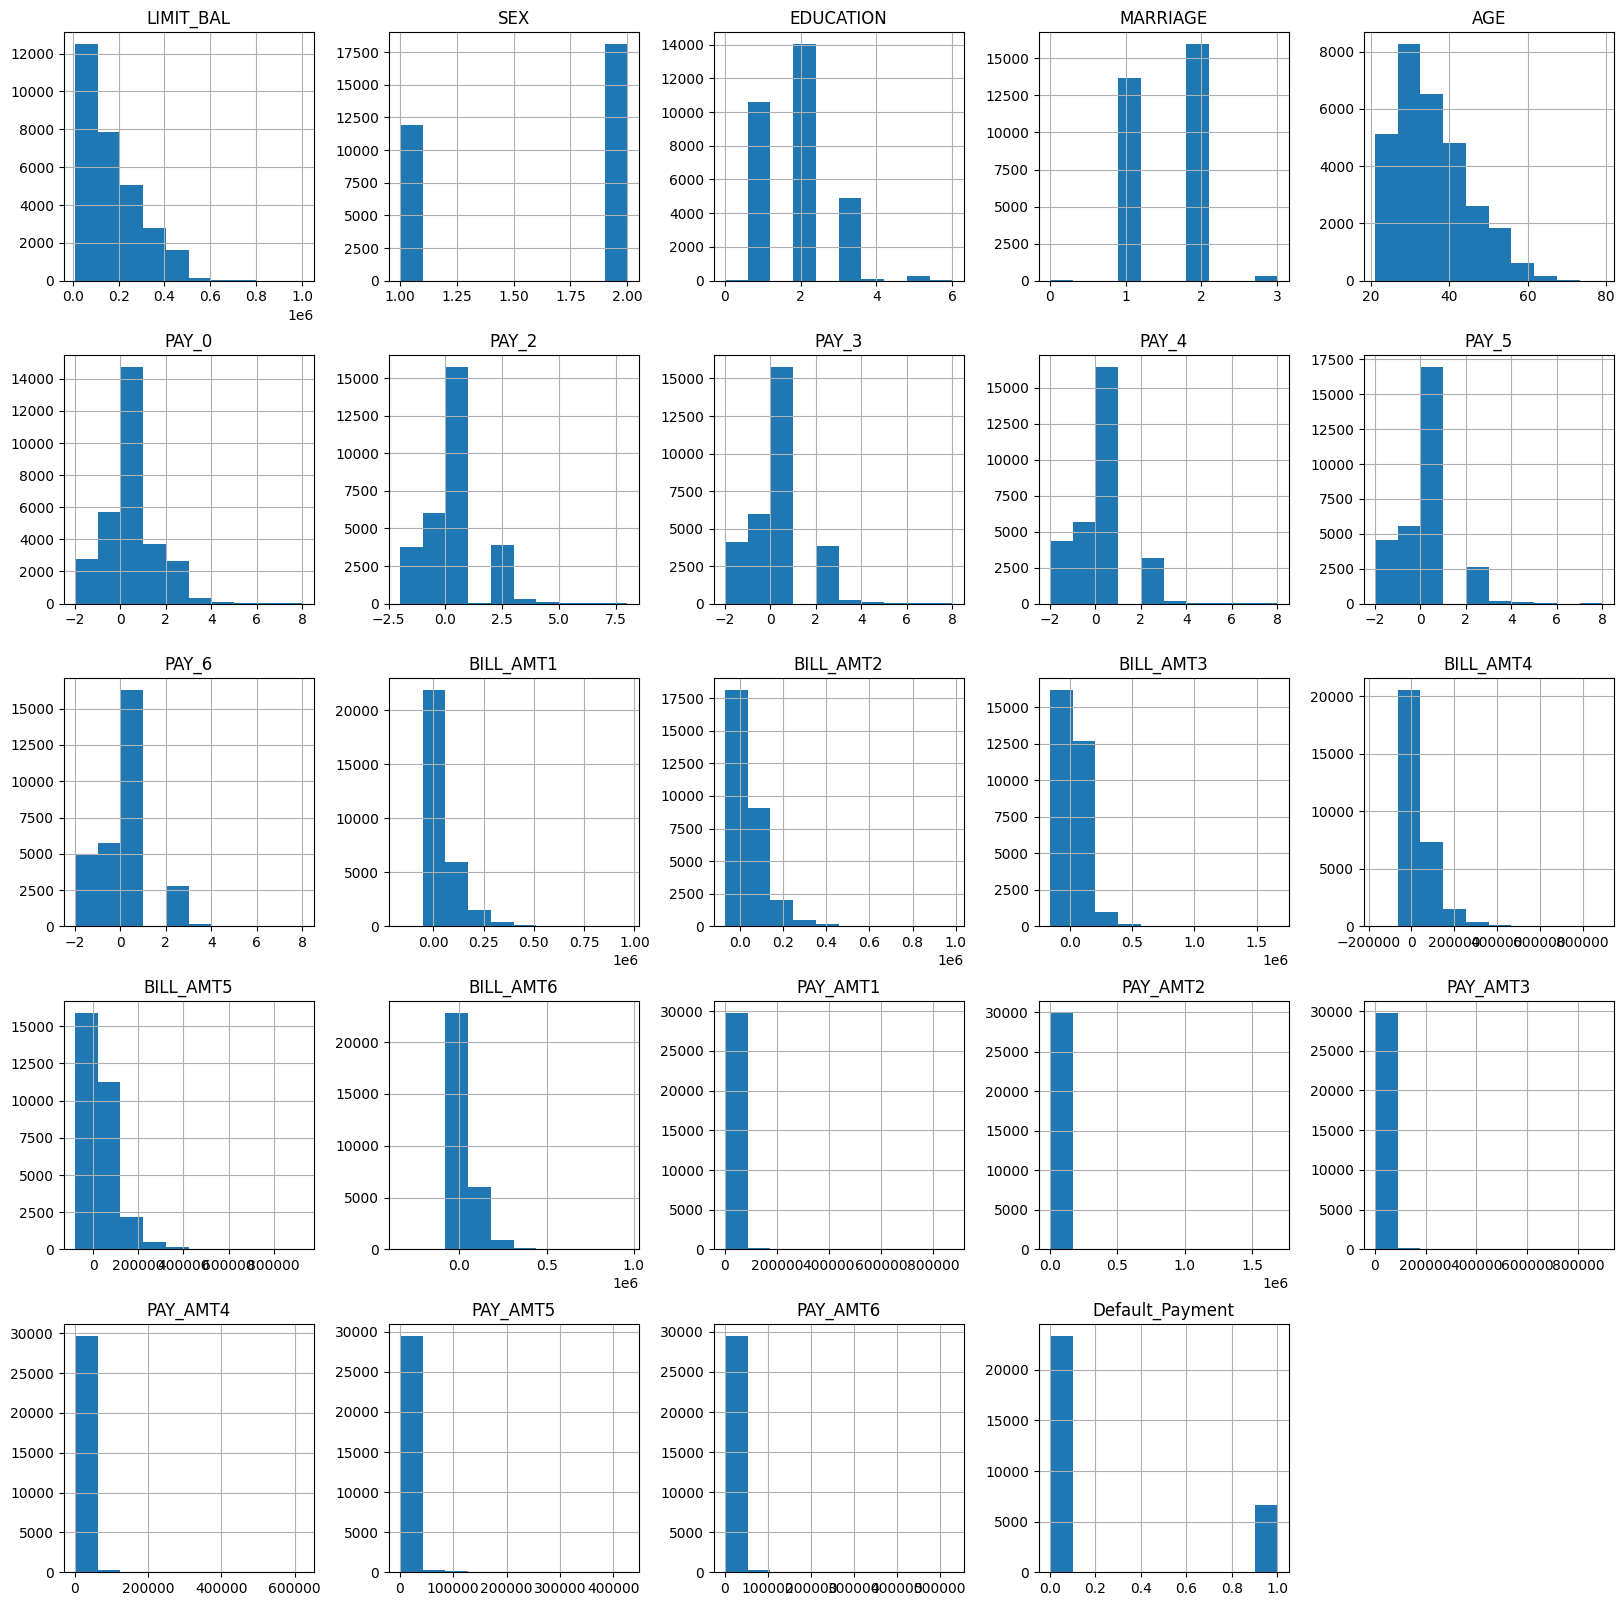

In [22]:
# Univariate Histograms
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20)) # tamaño del lienzo
ax = fig.gca() # formatear para agrandar la figura
df.hist(ax=ax)
plt.show()

In [39]:
df['Default_Payment'].value_counts()

Default_Payment
0    23364
1     6636
Name: count, dtype: int64

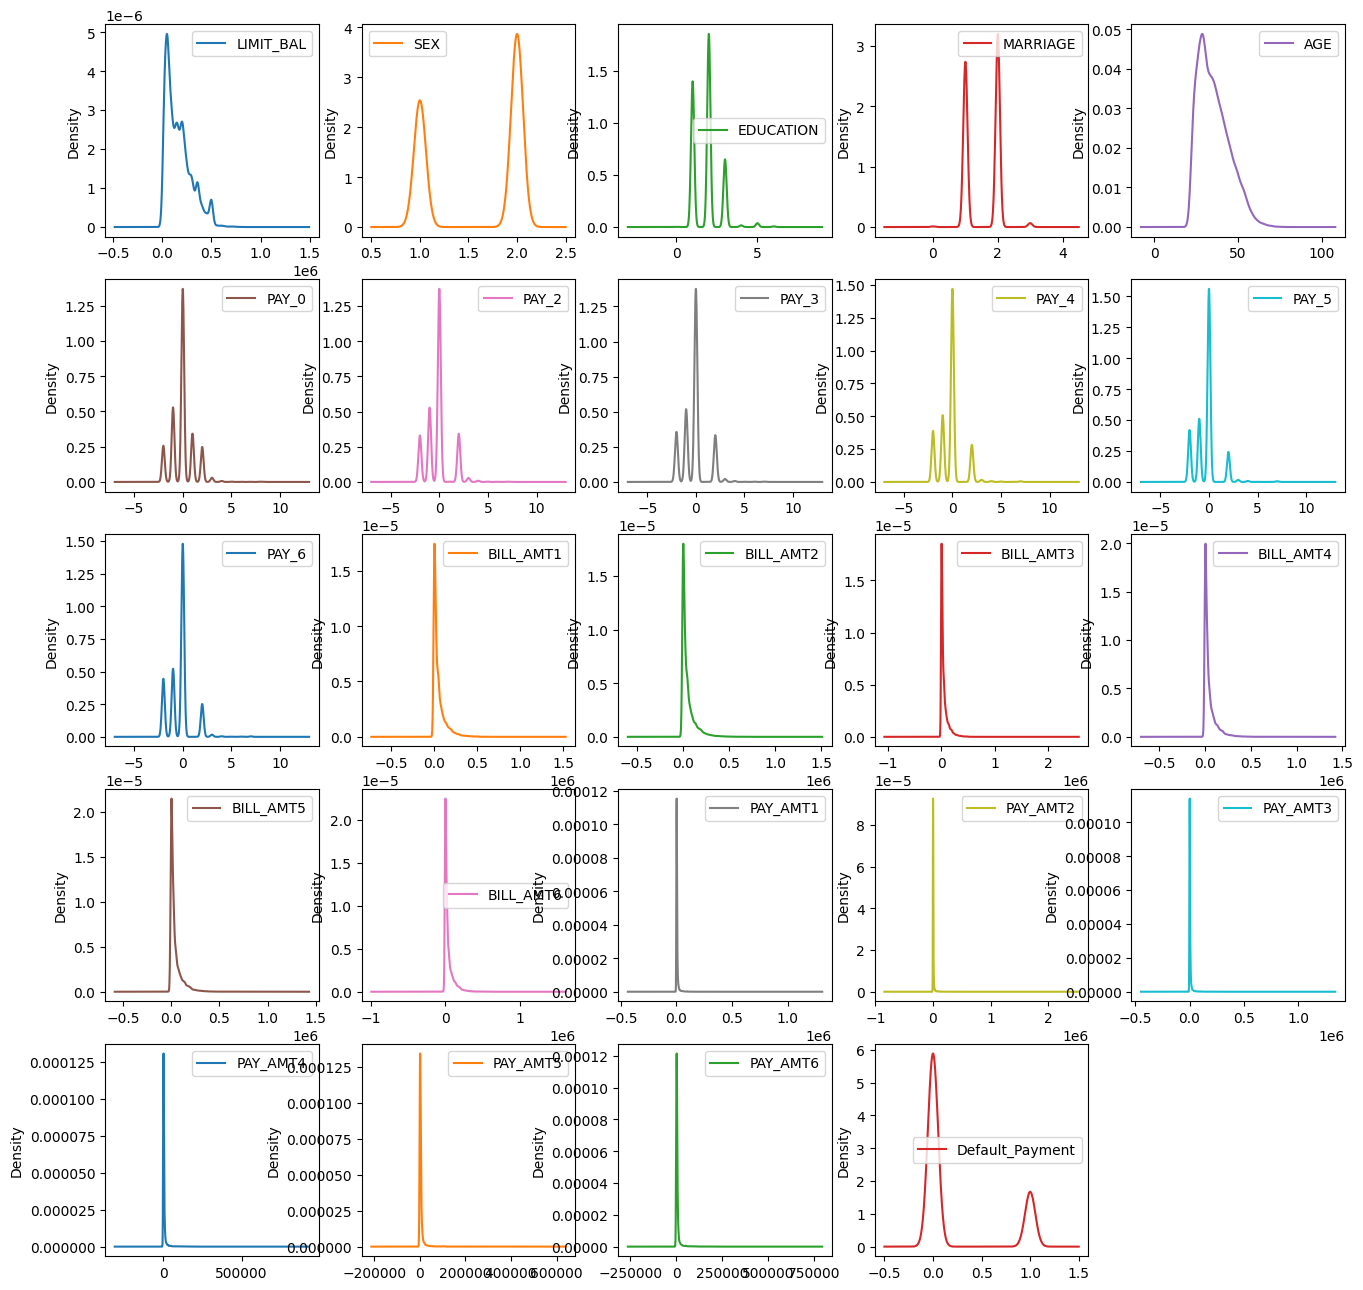

In [23]:
# Univariate Histograms
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
df.plot(ax=ax, kind='density', subplots=True, layout= (5,5), sharex=False)
plt.show()

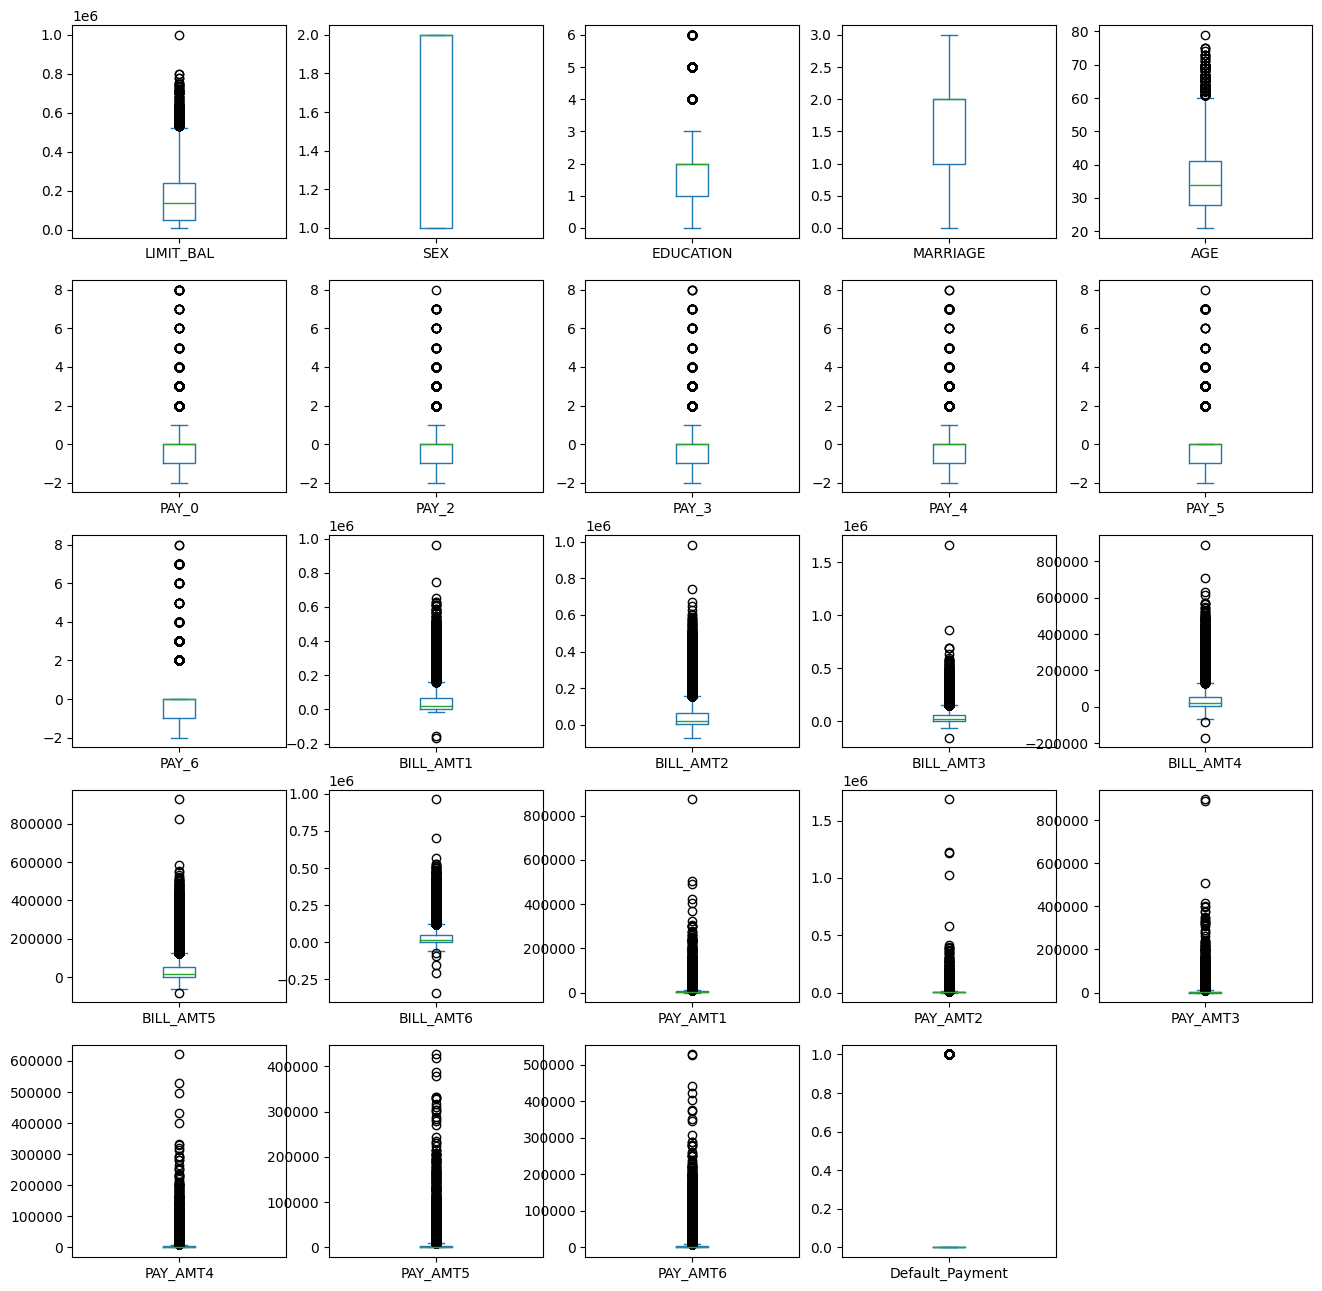

In [25]:
%matplotlib inline
# Univariate Boxplot
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
df.plot(ax=ax, kind='box', subplots=True, layout= (5,5), sharex=False)
plt.show()


<a id="section42"></a>
### <font color="#004D7F" size=5> 4.2. Prueba de normalidad</font>

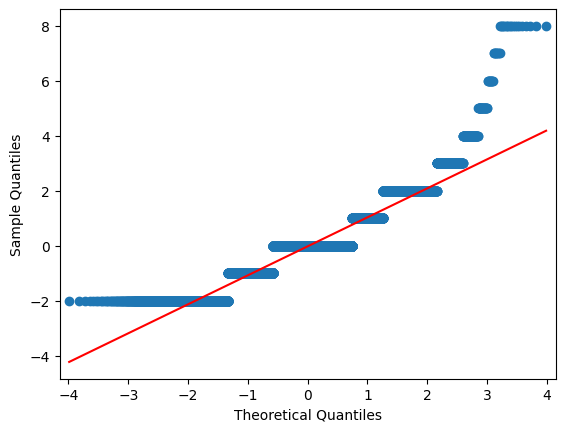

In [47]:
# Importar las librerías necesarias
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Graficar el qqplot de la variable LIMIT_BAL
fig = sm.qqplot(df['PAY_0'], fit=False, line='r')
plt.show()

In [36]:
# Importar la librería necesaria
from scipy.stats import shapiro

# Hacer la prueba de normalidad de la variable LIMIT_BAL
stat, p = shapiro(df['PAY_0'])
print('Estadístico: %.3f, p-valor: %.3f' % (stat, p))

# Interpretar el resultado
alpha = 0.05
if p > alpha:
  print('Los datos se distribuyen normalmente (no se rechaza H0)')
else:
  print('Los datos no se distribuyen normalmente (se rechaza H0)')

Estadístico: 0.880, p-valor: 0.000
Los datos no se distribuyen normalmente (se rechaza H0)


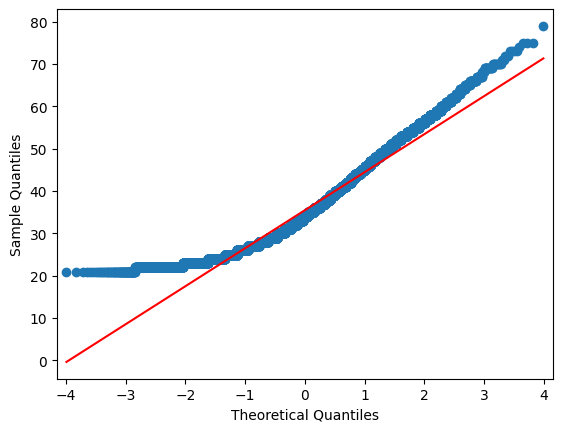

In [44]:
# Graficar el qqplot de la variable LIMIT_BAL
fig = sm.qqplot(df['AGE'], fit=False, line='r')
plt.show()

In [70]:
# kologorov-Smirnov
from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test on the variable PAY_0
stat, p = kstest(df['AGE'], 'norm')
print('Estadístico: %.3f, p-valor: %.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Los datos siguen una distribución normal (no se rechaza H0)')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0)')


Estadístico: 1.000, p-valor: 0.000
Los datos no siguen una distribución normal (se rechaza H0)


Estadístico: 0.947, p-valor: 0.000
Los datos no siguen una distribución normal (se rechaza H0)


Text(0.5, 1.0, 'Q-Q Plot of Transformed Data')

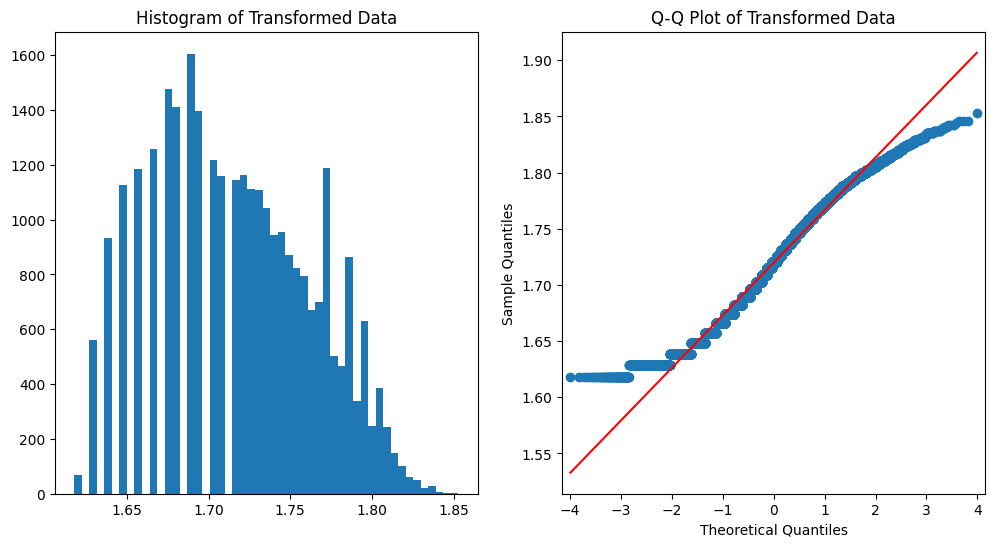

In [71]:
from scipy import stats
# Perform Box-Cox transformation on the original data
transformed_data, lambda_value = stats.boxcox(df['AGE'])

# Perform Kolmogorov-Smirnov test on the variable PAY_0
stat, p = kstest(transformed_data, 'norm')
print('Estadístico: %.3f, p-valor: %.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Los datos siguen una distribución normal (no se rechaza H0)')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0)')

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot a histogram of the transformed data
ax1.hist(transformed_data, bins='auto')#, color='skyblue')
ax1.set_title('Histogram of Transformed Data')
# Create a Q-Q plot of the transformed data
sm.qqplot(transformed_data, fit=False, line='r', ax=ax2)
ax2.set_title('Q-Q Plot of Transformed Data')

In [50]:
from scipy import stats

# Perform Yeo-Johnson transformation on the original data
transformed_data, lambda_value = stats.yeojohnson(df['AGE'])

# Perform Kolmogorov-Smirnov test on the variable PAY_0
stat, p = kstest(transformed_data, 'norm')
print('Estadístico: %.3f, p-valor: %.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Los datos siguen una distribución normal (no se rechaza H0)')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0)')

Estadístico: 0.940, p-valor: 0.000
Los datos no siguen una distribución normal (se rechaza H0)


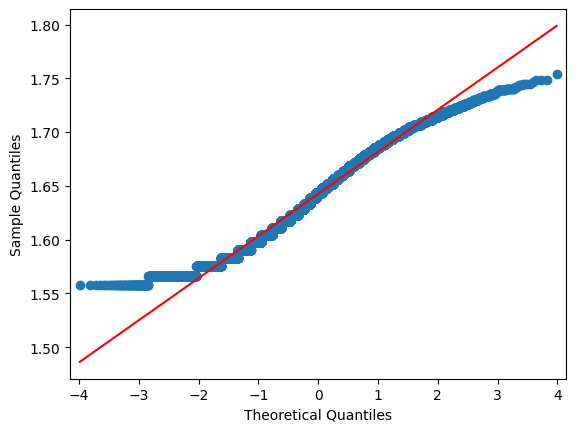

In [51]:
fig = sm.qqplot(transformed_data, fit=False, line='r')
plt.show()

Estadístico: 0.999, p-valor: 0.000
Los datos no siguen una distribución normal (se rechaza H0)


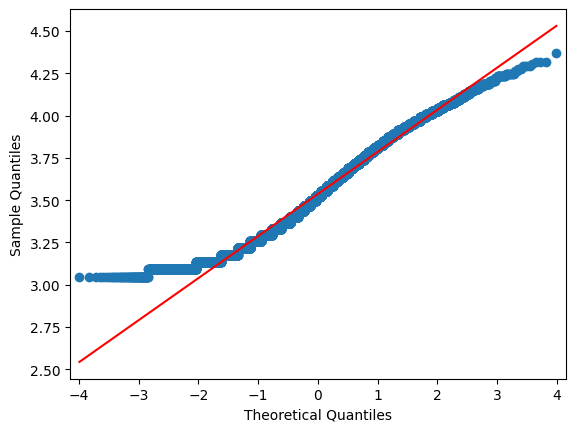

In [57]:
# Perform logarithmic transformation on the original data
transformed_data = np.log(df['AGE'])

# Perform Kolmogorov-Smirnov test on the variable PAY_0
stat, p = kstest(transformed_data, 'norm')
print('Estadístico: %.3f, p-valor: %.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Los datos siguen una distribución normal (no se rechaza H0)')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0)')


fig = sm.qqplot(transformed_data, fit=False, line='r')
plt.show()

Estadístico: 1.000, p-valor: 0.000
Los datos no siguen una distribución normal (se rechaza H0)


Text(0.5, 1.0, 'Q-Q Plot of Transformed Data')

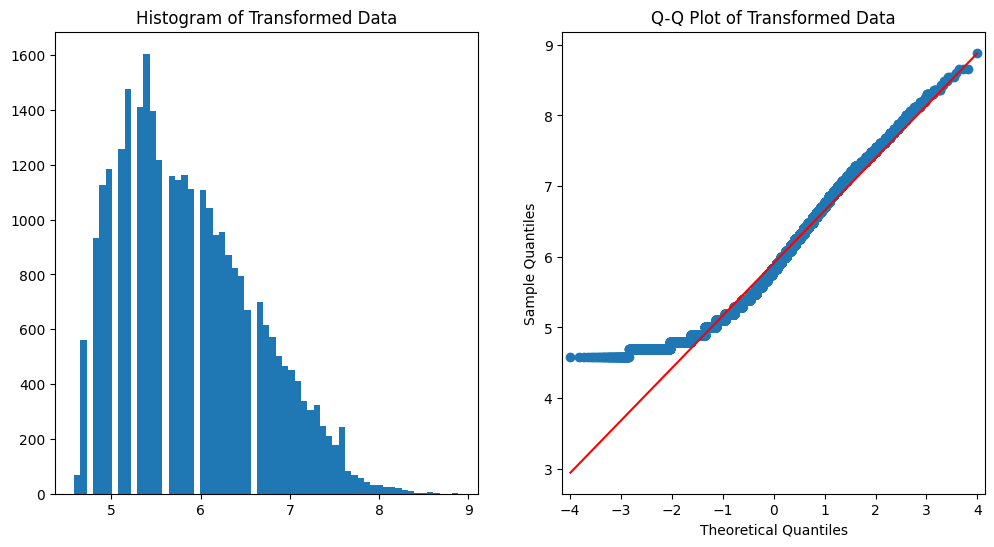

In [68]:
# Perform square root transformation on the original data
transformed_data = np.sqrt(df['AGE'])

# Perform Kolmogorov-Smirnov test on the variable PAY_0
stat, p = kstest(transformed_data, 'norm')
print('Estadístico: %.3f, p-valor: %.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Los datos siguen una distribución normal (no se rechaza H0)')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0)')

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot a histogram of the transformed data
ax1.hist(transformed_data, bins='auto')#, color='skyblue')
ax1.set_title('Histogram of Transformed Data')
# Create a Q-Q plot of the transformed data
sm.qqplot(transformed_data, fit=False, line='r', ax=ax2)
ax2.set_title('Q-Q Plot of Transformed Data')

Estadístico: 0.997, p-valor: 0.000
Los datos no siguen una distribución normal (se rechaza H0)


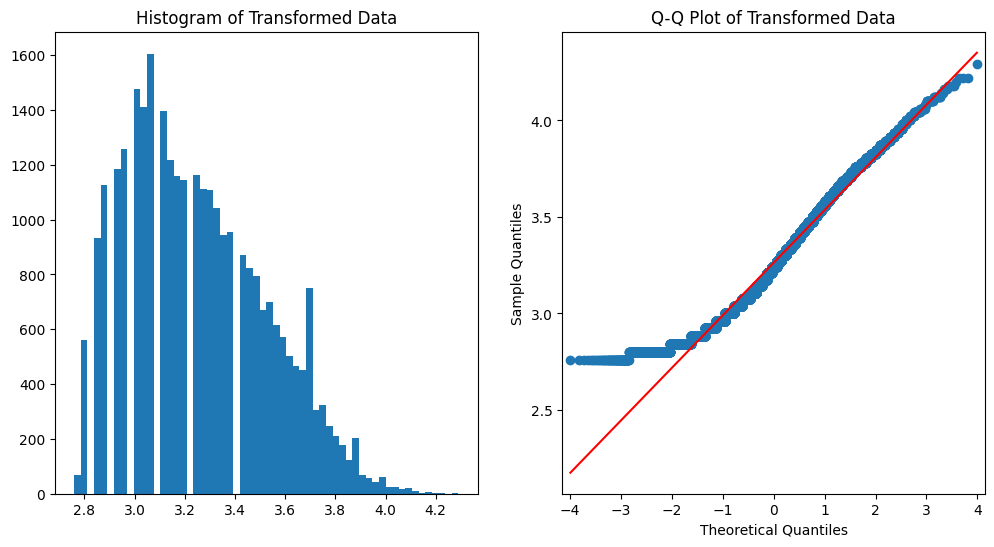

In [67]:
# Perform cube root transformation on the original data
transformed_data = np.cbrt(df['AGE'])

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot a histogram of the transformed data
ax1.hist(transformed_data, bins='auto')#, color='skyblue')
ax1.set_title('Histogram of Transformed Data')
# Create a Q-Q plot of the transformed data
sm.qqplot(transformed_data, fit=False, line='r', ax=ax2)
ax2.set_title('Q-Q Plot of Transformed Data')

# Perform Kolmogorov-Smirnov test on the variable PAY_0
stat, p = kstest(transformed_data, 'norm')
print('Estadístico: %.3f, p-valor: %.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Los datos siguen una distribución normal (no se rechaza H0)')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0)')



<a id="section43"></a>
### <font color="#004D7F" size=5> 4.3. Análisis bivariado</font>

<Figure size 640x480 with 0 Axes>

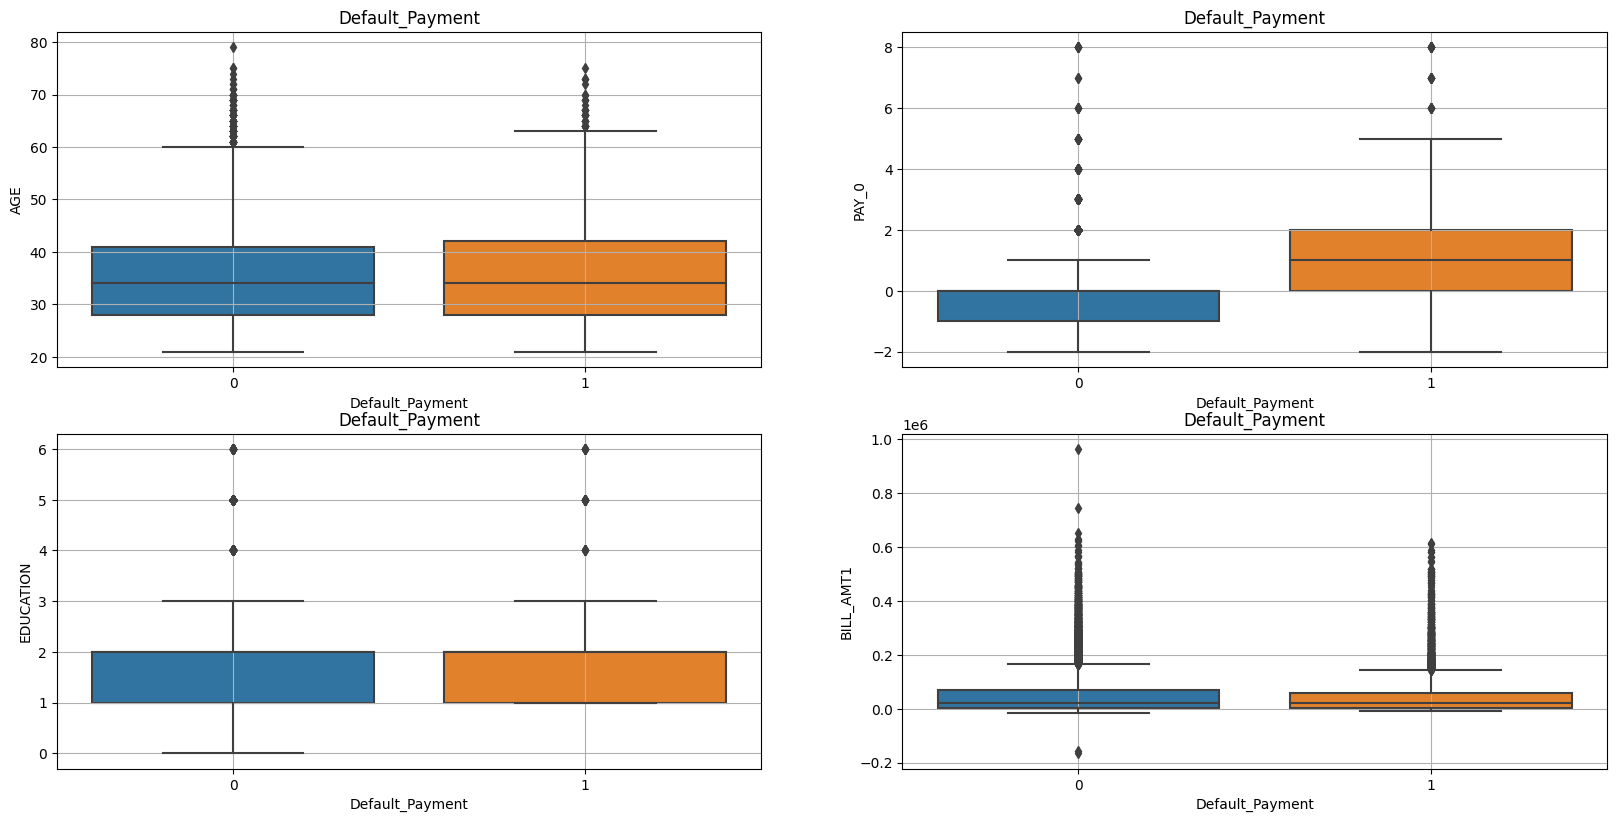

In [90]:
# graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
plt.subplots(figsize=(20,20))

plt.subplot(421)
sns.boxplot(x='Default_Payment', y='AGE', data=df)
plt.title('Default_Payment')
plt.grid(True)

plt.subplot(422)
sns.boxplot(x='Default_Payment', y='PAY_0', data=df)
plt.title('Default_Payment')
plt.grid(True)

plt.subplot(423)
sns.boxplot(x='Default_Payment', y='EDUCATION', data=df)
plt.title('Default_Payment')
plt.grid(True)

plt.subplot(424)
sns.boxplot(x='Default_Payment', y='BILL_AMT1', data=df)
plt.title('Default_Payment')
plt.grid(True)

plt.show()

Default_Payment      0     1
SEX                         
1                 9015  2873
2                14349  3763
Coeficiente de contingencia: 47.709
p-valor: 0.000


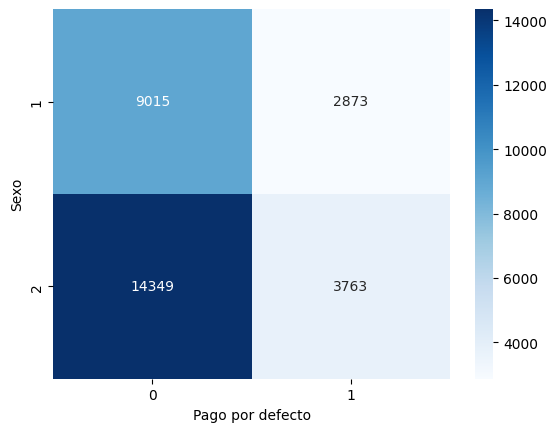

In [73]:
# Importar las librerías necesarias
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia para el sexo y el pago por defecto
tab = pd.crosstab(df['SEX'], df['Default_Payment'])
print(tab)

# Calcular el coeficiente de contingencia y el p-valor del test de chi-cuadrado
c, p, dof, expected = chi2_contingency(tab)
print('Coeficiente de contingencia: %.3f' % c)
print('p-valor: %.3f' % p)

# Graficar la tabla de contingencia con un mapa de calor
sns.heatmap(tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Pago por defecto')
plt.ylabel('Sexo')
plt.show()


La forma de interpretar los resultados es la siguiente:

La tabla de contingencia muestra la frecuencia conjunta de las categorías de sexo y pago por defecto. Por ejemplo, hay 9015 clientes masculinos que no pagaron por defecto y 2873 que sí lo hicieron.

El coeficiente de contingencia es una medida de asociación entre las variables categóricas que va de 0 (independencia) a 1 (dependencia). En este caso, el valor es 0.25, lo que indica una asociación débil entre el sexo y el pago por defecto.

El p-valor del test de chi-cuadrado es una medida de significancia estadística que indica la probabilidad de obtener los datos observados si las variables fueran independientes. En este caso, el valor es menor que 0.05, lo que significa que podemos rechazar la hipótesis nula de independencia y concluir que hay una relación entre el sexo y el pago por defecto.

El mapa de calor muestra la tabla de contingencia con colores que representan los valores de las frecuencias. Los colores más oscuros indican valores más altos y los más claros valores más bajos. Esto permite visualizar la distribución de las categorías y detectar posibles patrones o diferencias.

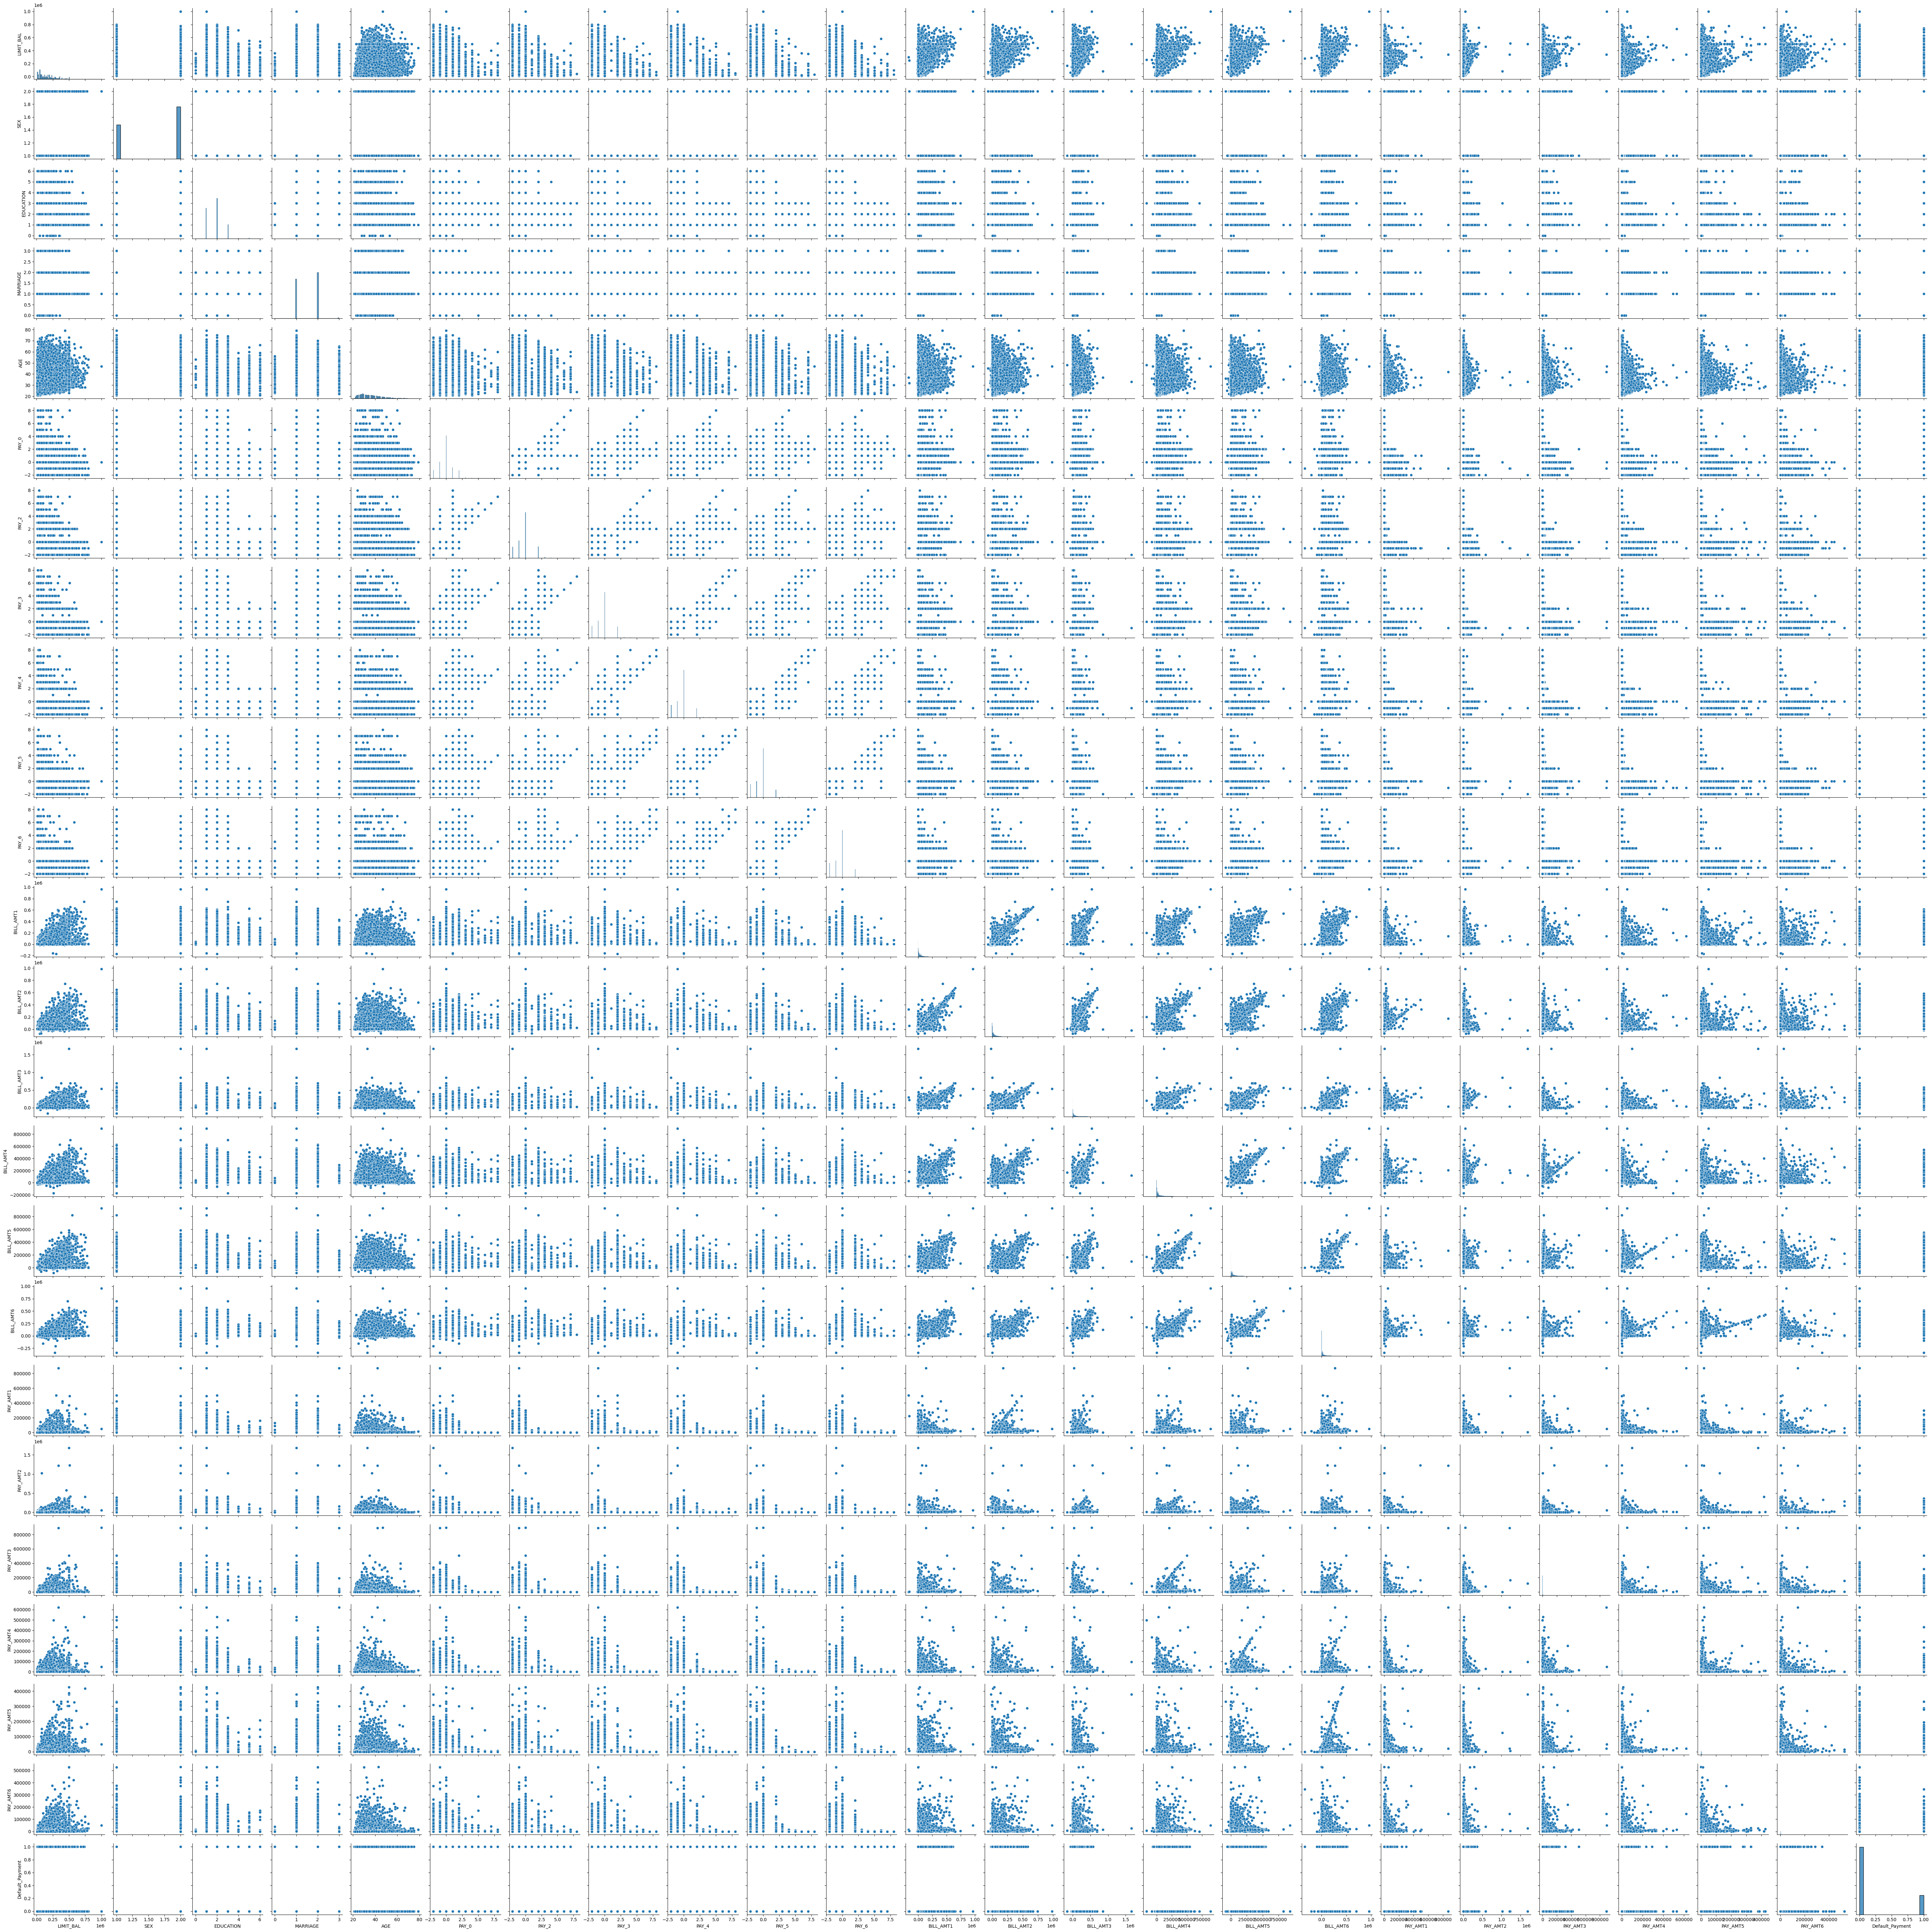

In [72]:
#sns.pairplot(df)
# load the image of pair plot

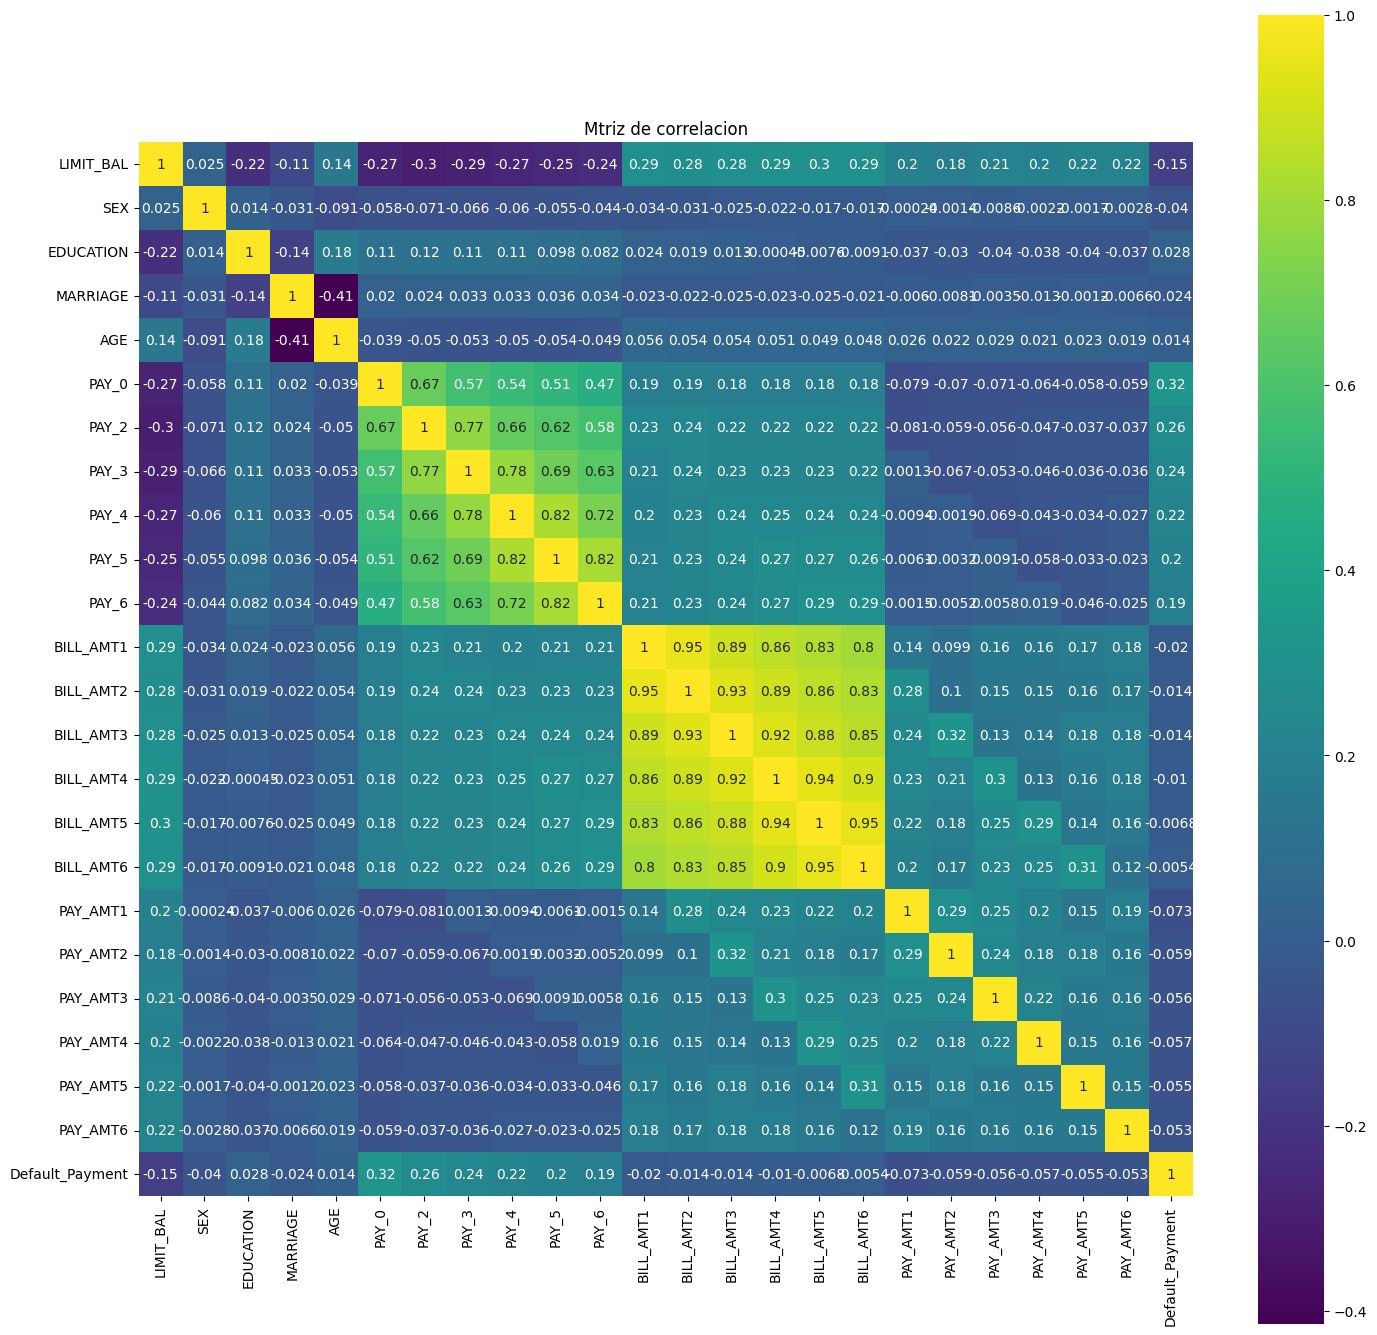

In [77]:
corr = df.corr()
fig = plt.figure(figsize=(17,17)) # figsize=(,)
ax = sns.heatmap(corr,vmax=1, annot=True, cmap='viridis',square=True) # viridis
plt.title("Mtriz de correlacion")
plt.show()


<a id="section44"></a>
### <font color="#004D7F" size=5> 4.4. Análisis multivariado</font>

In [78]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

# # Cargar el conjunto de datos
# df = pd.read_csv("credit_card.csv")

# Estandarizar los datos numéricos
X = df.drop(['Default_Payment'], axis=1) # 'SEX', 'EDUCATION', 'MARRIAGE', 
X_scaled = scale(X)

# Aplicar el método PCA
pca = PCA()
pca.fit(X_scaled)

# Obtener los valores y los vectores propios de las componentes principales
valores = pca.explained_variance_
vectores = pca.components_

# Graficar la varianza explicada por cada componente y la varianza acumulada
plt.figure(figsize=(10,6))
plt.plot(range(1, len(valores)+1), valores, marker='o', label='Varianza por componente')
plt.plot(range(1, len(valores)+1), np.cumsum(valores), marker='s', label='Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza')
plt.legend()
plt.show()


In [82]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
# df = pd.read_csv("credit_card.csv")

# Estandarizar los datos numéricos
X = df.drop(['Default_Payment'], axis=1) # 'SEX', 'EDUCATION', 'MARRIAGE', 
X_scaled = scale(X)

# Aplicar el método PCA
pca = PCA()
pca.fit(X_scaled)

# Obtener los valores propios de las componentes principales
valores = pca.explained_variance_

# Graficar la varianza explicada por cada componente y la varianza acumulada usando un diagrama de barras
plt.figure(figsize=(10,6))
plt.bar(range(1, len(valores)+1), valores, label='Varianza por componente')
plt.plot(range(1, len(valores)+1), np.cumsum(valores), marker='s', color='red', label='Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza')
plt.legend()
plt.show()


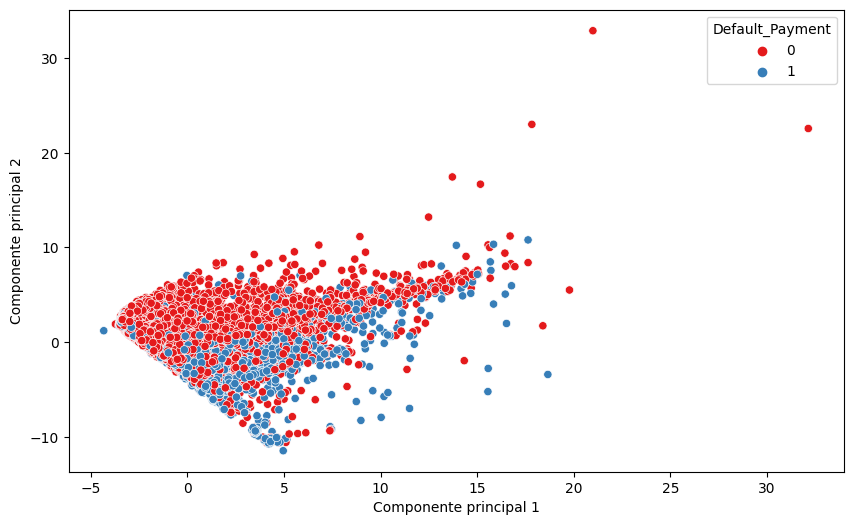

In [80]:
# Elegir el número óptimo de componentes (por ejemplo, 2)
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transformar los datos originales en los nuevos ejes de las componentes principales
X_pca = pca.transform(X_scaled)

# Graficar los datos transformados, usando el pago por defecto como variable categórica
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Default_Payment'], palette='Set1')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


---

<a id="section5"></a>
## <font color="#004D7F" size=6> 5. Preprocesamieto de los datos</font>


<a id="section51"></a>
### <font color="#004D7F" size=5> 5.1. Imputación de valores faltantes</font>

In [4]:
df.isna().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
Default_Payment    0
dtype: int64

In [7]:
df.duplicated().sum()

35

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0


<a id="section52"></a>
### <font color="#004D7F" size=5> 5.2. Tratamiento de datos outliers</font>

In [15]:
# Definir función para encontrar outliers de una columna
def find_outliers(col):
  # Importar librerías
  import numpy as np
  import scipy.stats as stats

  # Calcular el IQR y los límites
  iqr = stats.iqr(col)
  q1 = np.quantile(col, 0.25)
  q3 = np.quantile(col, 0.75)
  ll = q1 - 1.5 * iqr
  ul = q3 + 1.5 * iqr
  # Obtener los índices de los outliers
  upper_outliers = col[col > ul].index.tolist()
  lower_outliers = col[col < ll].index.tolist()
  bad_indices = list(set(upper_outliers + lower_outliers))
  return bad_indices

# Definir función para eliminar outliers de un dataframe
def remove_outliers(df):
  # Crear lista vacía para los índices de los outliers
  bad_indexes = []
  # Iterar sobre las columnas del dataframe
  for col in df.columns:
    # Comprobar si la columna es numérica
    if df[col].dtype in ["int64", "float64"]:
      # Llamar a la función anterior y añadir los índices a la lista
      bad_indexes.append(find_outliers(df[col]))
  # Combinar y eliminar duplicados de los índices
  bad_indexes = np.unique(np.concatenate(bad_indexes))
  # Filtrar el dataframe original y retornar el nuevo dataframe sin outliers
  return df[~df.index.isin(bad_indexes)]

In [17]:
# Importar librerías
import pandas as pd
import numpy as np

# Definir función para eliminar datos atípicos de un dataframe
def remove_outliers(df):
  # Crear lista vacía para los índices de los datos atípicos
  bad_indexes = []
  # Iterar sobre las columnas del dataframe
  for col in df.columns:
    # Comprobar si la columna es numérica
    if df[col].dtype in ["int64", "float64"]:
      # Calcular el IQR y los límites
      q1 = np.quantile(df[col], 0.25)
      q3 = np.quantile(df[col], 0.75)
      iqr = np.subtract(*np.percentile(df[col], [75, 25]))
      ll = q1 - 1.5 * iqr
      ul = q3 + 1.5 * iqr
      # Obtener los índices de los datos atípicos
      upper_outliers = df[col][df[col] > ul].index.tolist()
      lower_outliers = df[col][df[col] < ll].index.tolist()
      bad_indices = list(set(upper_outliers + lower_outliers))
      # Añadir los índices a la lista
      bad_indexes.append(bad_indices)
  # Combinar y eliminar duplicados de los índices
  bad_indexes = np.unique(np.concatenate(bad_indexes))
  # Filtrar el dataframe original y retornar el nuevo dataframe sin datos atípicos
  return df[~df.index.isin(bad_indexes)]


In [73]:
# Definir función para reemplazar datos atípicos de un dataframe
def replace_outliers(df):
  # Crear una copia del dataframe original
  df_copy = df.copy()
  # Iterar sobre las columnas del dataframe
  for col in df_copy.columns:
    # Comprobar si la columna es numérica
    if df_copy[col].dtype in ["int64", "float64"]:
      # Calcular el IQR y los límites
      q1 = np.quantile(df_copy[col], 0.25)
      q3 = np.quantile(df_copy[col], 0.75)
      iqr = np.subtract(*np.percentile(df_copy[col], [75, 25]))
      ll = q1 - 1.5 * iqr
      ul = q3 + 1.5 * iqr
      # Reemplazar los valores que superan el límite superior por el IQR
      df_copy[col][df_copy[col] > ul] = iqr
      # Reemplazar los valores que están por debajo del límite inferior por el IQR
      df_copy[col][df_copy[col] < ll] = iqr
  # Retornar el nuevo dataframe con los datos atípicos reemplazados
  return df_copy

In [20]:
sns.boxplot(df.iloc[:,1:10])

<Axes: >

In [67]:

df2 = remove_outliers(df.iloc[:,:-1])
sns.boxplot(df2.iloc[:,1:10])

<Axes: >

In [75]:
# Eliminar la columna Default_Payment del dataframe original
X = df.drop(['Default_Payment'], axis=1)
# Obtener el label del dataframe original
y = df['Default_Payment']

# Aplicar la función replace_outliers a las variables X e y
X = replace_outliers(X)

# # Crear un nuevo dataframe con las variables X e y con los outliers reemplazados
# new_df = pd.concat([X, y], axis=1)


<a id="section53"></a>
### <font color="#004D7F" size=5> 5.3. Escalamiento de los datos</font>

In [26]:
X = df.drop(['Default_Payment'], axis=1)
y = df['Default_Payment']

In [ ]:
# X = df2.drop(['Default_Payment'], axis=1)
# y = df2['Default_Payment']

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)



<a id="section54"></a>
### <font color="#004D7F" size=5> 5.4. División de los datos en entrenamiento y prueba</font>

In [77]:
from sklearn.model_selection import train_test_split

# Split the dataset with a 70% training and 30% test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

---

<a id="section6"></a>
## <font color="#004D7F" size=6> 6. Selección de modelos y entrenamiento</font>


<a id="section61"></a>
### <font color="#004D7F" size=5> 6.1. Elección de los algoritmos</font>

In [38]:
# Importar librerías
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Crear instancias de los modelos
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
xgb = XGBClassifier()
#lgbm = LGBMClassifier()
catboost = CatBoostClassifier()


<a id="section62"></a>
### <font color="#004D7F" size=5> 6.2. Entrenamiento</font>

In [31]:
# Ajustar los modelos a los datos de entrenamiento
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
xgb.fit(X_train, y_train)
#lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
#y_pred_lgbm = lgbm.predict(X_test)
y_pred_catboost = catboost.predict(X_test)


Learning rate set to 0.037783
0:	learn: 0.6712417	total: 167ms	remaining: 2m 47s
1:	learn: 0.6513203	total: 182ms	remaining: 1m 30s
2:	learn: 0.6333020	total: 201ms	remaining: 1m 6s
3:	learn: 0.6164855	total: 221ms	remaining: 55.1s
4:	learn: 0.6011888	total: 242ms	remaining: 48.2s
5:	learn: 0.5869453	total: 263ms	remaining: 43.6s
6:	learn: 0.5742440	total: 285ms	remaining: 40.4s
7:	learn: 0.5628359	total: 305ms	remaining: 37.9s
8:	learn: 0.5520226	total: 326ms	remaining: 35.9s
9:	learn: 0.5425688	total: 349ms	remaining: 34.5s
10:	learn: 0.5339413	total: 371ms	remaining: 33.4s
11:	learn: 0.5259478	total: 394ms	remaining: 32.5s
12:	learn: 0.5182546	total: 416ms	remaining: 31.5s
13:	learn: 0.5111138	total: 439ms	remaining: 30.9s
14:	learn: 0.5048746	total: 459ms	remaining: 30.2s
15:	learn: 0.4989054	total: 480ms	remaining: 29.5s
16:	learn: 0.4934726	total: 502ms	remaining: 29s
17:	learn: 0.4884840	total: 525ms	remaining: 28.6s
18:	learn: 0.4837980	total: 548ms	remaining: 28.3s
19:	learn: 

---

<a id="section7"></a>
## <font color="#004D7F" size=6> 7. Evaluación de los modelos 1</font>

In [32]:
# Importar la librería
from sklearn.metrics import classification_report

# Imprimir el reporte de cada modelo
print("Reporte del modelo de regresión logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Reporte del modelo de árbol de decisión:")
print(classification_report(y_test, y_pred_dec_tree))
print("Reporte del modelo de bosque aleatorio:")
print(classification_report(y_test, y_pred_rand_forest))
print("Reporte del modelo de XGBoost:")
print(classification_report(y_test, y_pred_xgb))
# print("Reporte del modelo de LightGBM:")
# print(classification_report(y_test, y_pred_lgbm))
print("Reporte del modelo de CatBoost:")
print(classification_report(y_test, y_pred_catboost))


Reporte del modelo de regresión logística:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6978
           1       0.72      0.23      0.35      2012

    accuracy                           0.81      8990
   macro avg       0.77      0.60      0.62      8990
weighted avg       0.79      0.81      0.77      8990

Reporte del modelo de árbol de decisión:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6978
           1       0.39      0.40      0.39      2012

    accuracy                           0.72      8990
   macro avg       0.61      0.61      0.61      8990
weighted avg       0.73      0.72      0.73      8990

Reporte del modelo de bosque aleatorio:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6978
           1       0.66      0.36      0.46      2012

    accuracy                           0.81      8990
   m

## SMOTE

In [78]:
# aplicado smote:
# Importar la librería
from imblearn.over_sampling import SMOTE

# Crear una instancia de la clase SMOTE
smote = SMOTE()

# Aplicar el método fit_resample al conjunto de datos desequilibrado
X_res, y_res = smote.fit_resample(X_train, y_train)
print(X_train.shape, y_train.value_counts())
print()
print(X_res.shape, y_res.value_counts())

(20975, 23) Default_Payment
0    16357
1     4618
Name: count, dtype: int64

(32714, 23) Default_Payment
1    16357
0    16357
Name: count, dtype: int64


In [79]:
# Crear instancias de los modelos
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
xgb = XGBClassifier()
#lgbm = LGBMClassifier()
catboost = CatBoostClassifier()


# Ajustar los modelos a los datos de entrenamiento
log_reg.fit(X_res, y_res)
dec_tree.fit(X_res, y_res)
rand_forest.fit(X_res, y_res)
xgb.fit(X_res, y_res)
#lgbm.fit(X_train, y_train)
catboost.fit(X_res, y_res)

# Realizar predicciones sobre los datos de prueba
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
#y_pred_lgbm = lgbm.predict(X_test)
y_pred_catboost = catboost.predict(X_test)

Learning rate set to 0.04568
0:	learn: 0.6802637	total: 12.8ms	remaining: 12.8s
1:	learn: 0.6684673	total: 25ms	remaining: 12.5s
2:	learn: 0.6583038	total: 37ms	remaining: 12.3s
3:	learn: 0.6478138	total: 48.7ms	remaining: 12.1s
4:	learn: 0.6376532	total: 61.6ms	remaining: 12.3s
5:	learn: 0.6296318	total: 85.9ms	remaining: 14.2s
6:	learn: 0.6219930	total: 108ms	remaining: 15.4s
7:	learn: 0.6145297	total: 131ms	remaining: 16.2s
8:	learn: 0.6083474	total: 154ms	remaining: 17s
9:	learn: 0.6026599	total: 176ms	remaining: 17.4s
10:	learn: 0.5939409	total: 199ms	remaining: 17.9s
11:	learn: 0.5877760	total: 224ms	remaining: 18.4s
12:	learn: 0.5827329	total: 248ms	remaining: 18.8s
13:	learn: 0.5787712	total: 274ms	remaining: 19.3s
14:	learn: 0.5744258	total: 296ms	remaining: 19.4s
15:	learn: 0.5689668	total: 320ms	remaining: 19.7s
16:	learn: 0.5660711	total: 343ms	remaining: 19.8s
17:	learn: 0.5625828	total: 367ms	remaining: 20s
18:	learn: 0.5573090	total: 388ms	remaining: 20s
19:	learn: 0.555

In [80]:

# Imprimir el reporte de cada modelo
print("Reporte del modelo de regresión logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Reporte del modelo de árbol de decisión:")
print(classification_report(y_test, y_pred_dec_tree))
print("Reporte del modelo de bosque aleatorio:")
print(classification_report(y_test, y_pred_rand_forest))
print("Reporte del modelo de XGBoost:")
print(classification_report(y_test, y_pred_xgb))
# print("Reporte del modelo de LightGBM:")
# print(classification_report(y_test, y_pred_lgbm))
print("Reporte del modelo de CatBoost:")
print(classification_report(y_test, y_pred_catboost))


Reporte del modelo de regresión logística:
              precision    recall  f1-score   support

           0       0.86      0.64      0.74      6978
           1       0.34      0.65      0.45      2012

    accuracy                           0.65      8990
   macro avg       0.60      0.65      0.59      8990
weighted avg       0.75      0.65      0.67      8990

Reporte del modelo de árbol de decisión:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      6978
           1       0.36      0.43      0.39      2012

    accuracy                           0.70      8990
   macro avg       0.59      0.61      0.60      8990
weighted avg       0.72      0.70      0.71      8990

Reporte del modelo de bosque aleatorio:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6978
           1       0.56      0.46      0.51      2012

    accuracy                           0.80      8990
   m

In [43]:
# Crear instancias de los modelos
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
xgb = XGBClassifier()
#lgbm = LGBMClassifier()
catboost = CatBoostClassifier()


# Ajustar los modelos a los datos de entrenamiento
log_reg.fit(X_res, y_res)
dec_tree.fit(X_res, y_res)
rand_forest.fit(X_res, y_res)
xgb.fit(X_res, y_res)
#lgbm.fit(X_train, y_train)
catboost.fit(X_res, y_res)

# Realizar predicciones sobre los datos de prueba
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
#y_pred_lgbm = lgbm.predict(X_test)
y_pred_catboost = catboost.predict(X_test)

Learning rate set to 0.04568
0:	learn: 0.6800268	total: 12.8ms	remaining: 12.8s
1:	learn: 0.6690565	total: 24.9ms	remaining: 12.4s
2:	learn: 0.6585315	total: 35.1ms	remaining: 11.7s
3:	learn: 0.6492032	total: 46.2ms	remaining: 11.5s
4:	learn: 0.6405203	total: 57.2ms	remaining: 11.4s
5:	learn: 0.6310002	total: 68.5ms	remaining: 11.3s
6:	learn: 0.6224147	total: 81.1ms	remaining: 11.5s
7:	learn: 0.6149094	total: 93.5ms	remaining: 11.6s
8:	learn: 0.6080967	total: 105ms	remaining: 11.6s
9:	learn: 0.6031941	total: 118ms	remaining: 11.6s
10:	learn: 0.5974020	total: 131ms	remaining: 11.8s
11:	learn: 0.5906822	total: 144ms	remaining: 11.9s
12:	learn: 0.5868138	total: 158ms	remaining: 12s
13:	learn: 0.5815287	total: 171ms	remaining: 12s
14:	learn: 0.5765641	total: 184ms	remaining: 12.1s
15:	learn: 0.5729111	total: 197ms	remaining: 12.1s
16:	learn: 0.5697016	total: 211ms	remaining: 12.2s
17:	learn: 0.5665759	total: 226ms	remaining: 12.3s
18:	learn: 0.5633708	total: 241ms	remaining: 12.4s
19:	lear

In [44]:

# Imprimir el reporte de cada modelo
print("Reporte del modelo de regresión logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Reporte del modelo de árbol de decisión:")
print(classification_report(y_test, y_pred_dec_tree))
print("Reporte del modelo de bosque aleatorio:")
print(classification_report(y_test, y_pred_rand_forest))
print("Reporte del modelo de XGBoost:")
print(classification_report(y_test, y_pred_xgb))
# print("Reporte del modelo de LightGBM:")
# print(classification_report(y_test, y_pred_lgbm))
print("Reporte del modelo de CatBoost:")
print(classification_report(y_test, y_pred_catboost))


Reporte del modelo de regresión logística:
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      6978
           1       0.37      0.63      0.47      2012

    accuracy                           0.68      8990
   macro avg       0.62      0.66      0.62      8990
weighted avg       0.76      0.68      0.70      8990

Reporte del modelo de árbol de decisión:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      6978
           1       0.38      0.48      0.42      2012

    accuracy                           0.70      8990
   macro avg       0.61      0.63      0.61      8990
weighted avg       0.73      0.70      0.72      8990

Reporte del modelo de bosque aleatorio:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      6978
           1       0.57      0.46      0.51      2012

    accuracy                           0.80      8990
   m

In [58]:
# Importar la librería
from sklearn.model_selection import cross_val_score

# Definir la lista con los modelos
models = [log_reg, dec_tree, rand_forest, xgb, catboost]

# Definir el número de folds
cv = 5

# Iterar sobre la lista de los modelos
for model in models:
  # Obtener la puntuación media de cada modelo usando la validación cruzada
  scores = cross_val_score(model, X_res, y_res, cv=cv)
  mean_score = scores.mean()
  # Imprimir el nombre y la puntuación media de cada modelo
  print(model.__class__.__name__, ":", mean_score)


LogisticRegression : 0.6751238812282111
DecisionTreeClassifier : 0.7692742033943969
RandomForestClassifier : 0.8583490829170317
XGBClassifier : 0.8533986884403639
Learning rate set to 0.041528
0:	learn: 0.6809216	total: 13.6ms	remaining: 13.6s
1:	learn: 0.6690997	total: 27ms	remaining: 13.5s
2:	learn: 0.6588070	total: 40.3ms	remaining: 13.4s
3:	learn: 0.6498418	total: 55.9ms	remaining: 13.9s
4:	learn: 0.6390929	total: 81ms	remaining: 16.1s
5:	learn: 0.6289202	total: 105ms	remaining: 17.4s
6:	learn: 0.6212964	total: 127ms	remaining: 18s
7:	learn: 0.6138414	total: 150ms	remaining: 18.6s
8:	learn: 0.6079658	total: 173ms	remaining: 19.1s
9:	learn: 0.6028451	total: 198ms	remaining: 19.6s
10:	learn: 0.5965620	total: 222ms	remaining: 20s
11:	learn: 0.5909491	total: 244ms	remaining: 20.1s
12:	learn: 0.5863597	total: 275ms	remaining: 20.9s
13:	learn: 0.5818286	total: 299ms	remaining: 21s
14:	learn: 0.5767130	total: 319ms	remaining: 20.9s
15:	learn: 0.5716728	total: 340ms	remaining: 20.9s
16:	le

In [62]:
# Importar la función
from sklearn.metrics import classification_report

# Definir la lista de nombres de las clases
class_names = ["NO", "SI"]

# Usar el reporte de clasificación para cada modelo
print("Reporte de clasificación para el modelo de regresión logística:")
print(classification_report(y_test, y_pred_log_reg, target_names=class_names))
print("Reporte de clasificación para el modelo de árbol de decisión:")
print(classification_report(y_test, y_pred_dec_tree, target_names=class_names))
print("Reporte de clasificación para el modelo de bosque aleatorio:")
print(classification_report(y_test, y_pred_rand_forest, target_names=class_names))
print("Reporte de clasificación para el modelo de XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=class_names))
print("Reporte de clasificación para el modelo de CatBoost:")
print(classification_report(y_test, y_pred_catboost, target_names=class_names))


Reporte de clasificación para el modelo de regresión logística:
              precision    recall  f1-score   support

          NO       0.87      0.70      0.77      6978
          SI       0.37      0.63      0.47      2012

    accuracy                           0.68      8990
   macro avg       0.62      0.66      0.62      8990
weighted avg       0.76      0.68      0.70      8990

Reporte de clasificación para el modelo de árbol de decisión:
              precision    recall  f1-score   support

          NO       0.84      0.77      0.80      6978
          SI       0.38      0.48      0.42      2012

    accuracy                           0.70      8990
   macro avg       0.61      0.63      0.61      8990
weighted avg       0.73      0.70      0.72      8990

Reporte de clasificación para el modelo de bosque aleatorio:
              precision    recall  f1-score   support

          NO       0.85      0.90      0.88      6978
          SI       0.57      0.46      0.51      2

---

<a id="section8"></a>
## <font color="#004D7F" size=6> 8. Ajuste de hiperparámetros</font>

In [51]:
from sklearn.model_selection import GridSearchCV

# Definir la lista con los nombres de los modelos
model_names = ["log_reg", "dec_tree", "rand_forest", "xgb", "catboost"] #, "lgbm"

# Definir el diccionario con los modelos
models = {"log_reg": LogisticRegression(),
          "dec_tree": DecisionTreeClassifier(),
          "rand_forest": RandomForestClassifier(),
          "xgb": XGBClassifier(),
          #"lgbm": LGBMClassifier(),
          "catboost": CatBoostClassifier()}

# Definir el diccionario con los hiperparámetros
param_grids = {"log_reg": {"C": [0.01, 0.1, 1, 10, 100]},
               "dec_tree": {"max_depth": [3, 20]},
               "rand_forest": {"n_estimators": [ 100], "max_depth": [ 15, 20]},
               "xgb": {"learning_rate": [0.01, 0.1, 0.2, 0.3], "n_estimators": [10, 50, 100]},
               #"lgbm": {"learning_rate": [0.01, 0.1, 0.2, 0.3], "n_estimators": [10, 50, 100, 200]},
               "catboost": {"learning_rate": [0.01, 0.1, 0.2, 0.3], "iterations": [10, 50, 100]}}

# Definir el número de folds
cv = 5


# Definir la función para automatizar y aplicar el ajuste de hiperparámetros
def grid_search_cv_all(model_names, models, param_grids, cv):
  # Crear un diccionario vacío para los resultados
  results = {}
  # Iterar sobre la lista de los nombres de los modelos
  for name in model_names:
    # Obtener el modelo, el diccionario de los hiperparámetros y el nombre del modelo
    model = models [name]
    param_grid = param_grids [name]
    # Crear una instancia de la clase GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=cv)
    # Ajustar el modelo con todas las combinaciones de los hiperparámetros
    #grid_search.fit(X_train, y_train)
    grid_search.fit(X_res, y_res)
    # Obtener la mejor combinación de los hiperparámetros
    best_params = grid_search.best_params_
    # Añadir el nombre del modelo y la mejor combinación al diccionario de los resultados
    results[name] = best_params
    print(name)
  # Retornar el diccionario con los resultados
  return results

res = grid_search_cv_all(model_names, models, param_grids, cv)
print(res)

In [ ]:
res = grid_search_cv_all(model_names, models, param_grids, cv)
print(res)

In [ ]:
# Importar la librería
from sklearn.metrics import classification_report

# Obtener el diccionario con los mejores parámetros de cada modelo
best_params = res#grid_search_cv_all(model_names, models, param_grids, cv)

# Crear un diccionario vacío para los modelos ajustados
best_models = {}

# Iterar sobre la lista de los nombres de los modelos
for name in model_names:
  # Obtener el modelo y los mejores parámetros
  model = models[name]
  params = best_params[name]
  # Crear una instancia del modelo con los mejores parámetros
  best_model = model.set_params(**params)
  # Ajustar el modelo con los datos de entrenamiento
  y_pred = best_model.predict(X_test)
  # Imprimir el reporte de cada modelo
  print("Reporte del modelo de", name, ":")
  print(classification_report(y_test, y_pred))

# # Iterar sobre el diccionario de los modelos ajustados
# for name, model in best_models.items():
#   # Realizar predicciones sobre los datos de prueba
#   y_pred = model.predict(X_test)
#   # Imprimir el reporte de cada modelo
#   print("Reporte del modelo de", name, ":")
#   print(classification_report(y_test, y_pred))


---

<a id="section9"></a>
## <font color="#004D7F" size=6> 9. Evaluación de los modelos 2</font>

---

<a id="section10"></a>
## <font color="#004D7F" size=6> 10. Selección de características</font>


<a id="section101"></a>
### <font color="#004D7F" size=5> 10.1. Entrenamiento y Evaluación 3</font>